## Environment Setup and Imports

### Library imports

In [0]:
import pandas as pd
import csv
import pickle
import string
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, MaxPool1D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import h5py
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras import backend as K

import tensorflow as tf
from tensorflow.python.client import device_lib

Using TensorFlow backend.


### Setup for display window

In [0]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.width', 1000)

### Downloading glove vector

In [0]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove*.zip
!ls

--2019-08-17 16:45:23--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2019-08-17 16:45:23--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2019-08-17 16:45:23--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

#### Load Glove vector in pandas dataframe

In [0]:
glove = pd.read_table("glove.42B.300d.txt", sep=' ', index_col=0, header=None, quoting=csv.QUOTE_NONE)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [0]:
glove.head()

1         2         3         4         5         6       7         8         9         10        11       12       13        14        15        16       17        18       19        20        21        22        23       24        25        26        27        28        29        30   ...       271       272      273       274       275       276       277      278       279      280       281       282       283      284       285      286       287       288       289      290       291       292       293       294      295       296       297       298       299       300
0                                                                                                                                                                                                                                                                                                        ...                                                                                                                                                                                                                                                                                                     
,    0.18378 -0.121230 -0.119870  0.015227 -0.191210 -0.066074 -2.9876  0.807950  0.067338 -0.131840 -0.527400  0.44521  0.12982 -0.218230 -0.450800 -0.224780 -0.30766 -0.111370 -0.16200 -0.212940 -0.460220 -0.086593 -0.249020  0.46729 -0.602300 -0.449720  0.439460  0.014738  0.274980 -0.078421  ... -0.209940 -0.085675 -0.26173 -0.107640 -0.148020  0.175730 -0.178040 -0.21765  0.307300 -0.44590  0.039130 -0.220650  0.221400  0.32727 -0.403780  0.33021 -0.139420 -0.410030 -0.175260  0.21852  0.136150  0.109990 -0.334740 -0.046109  0.10780 -0.035657 -0.012921 -0.039038  0.182740  0.146540
the -0.20838 -0.149320 -0.017528 -0.028432 -0.060104 -0.264600 -4.1445  0.629320  0.336720 -0.433950  0.398990 -0.19573  0.13977 -0.021519  0.378230 -0.552500 -0.11230 -0.008144  0.29059  0.066817  0.104650 -0.086943 -0.048983 -0.26757 -0.470380  0.274690  0.069245 -0.027967 -0.197190  0.016749  ... -0.017976 -0.426220 -0.10095  0.044992 -0.090225  0.229150  0.186100  0.36366 -0.206760 -0.33037  0.473020  0.233800  0.079306  0.21083  0.210130  0.15275  0.080873 -0.330130 -0.171810 -0.07017 -0.041244 -0.461820  0.027903  0.546570 -0.25894  0.395150  0.261440 -0.540660  0.211990 -0.009436
.    0.10876  0.002244  0.222130 -0.121020 -0.048959  0.018135 -3.8174 -0.032631 -0.625940 -0.518980 -0.358930  0.78871 -0.29777  0.005186 -0.418140  0.246910 -0.13584 -0.190460 -0.29987 -0.636960 -0.065406  0.114360 -0.021438  0.17501 -0.194940 -0.089508 -0.106310 -0.241070  0.128560  0.335770  ...  0.026230  0.028116 -0.40880  0.171480 -0.504480  0.100870  0.392200  0.14905  0.209620 -0.11509  0.320920 -0.320450  0.035085  0.67025 -0.618080 -0.13169 -0.032892  0.214760 -0.003332  0.52406  0.063131 -0.212300 -0.300880 -0.451610  0.26480  0.075971 -0.406880 -0.296960  0.159390 -0.149020
and -0.09611 -0.257880 -0.358600 -0.328870  0.579500 -0.517740 -4.1582 -0.113710 -0.108480 -0.488850  0.199310 -0.10540 -0.43825 -0.344830 -0.450520 -0.348640 -0.45800 -0.815540  0.22006  0.202540 -0.109540  0.125200 -0.541170  0.34731 -0.099998 -0.018998 -0.142770 -0.424810 -0.009409 -0.431550  ... -0.167800 -0.444380 -0.73051  0.109570  0.131220  0.085623  0.125040 -0.40337  0.041765 -0.27574  0.062513  0.051093  0.399260  0.11149 -0.056462  0.26809 -0.395690  0.310330 -0.049750 -0.33139  0.477810 -0.021213 -0.212360  0.423740  0.14083  0.067498 -0.126750 -0.370300 -0.092774  0.390580
to  -0.24837 -0.454610  0.039227 -0.284220 -0.031852  0.263550 -4.6323  0.013890 -0.539280 -0.084454  0.061556 -0.41552 -0.14599 -0.593210 -0.028738 -0.034991 -0.29698 -0.079850  0.27312  0.220400 -0.089859  0.000883 -0.419910 -0.12536 -0.054629  0.030550  0.193400 -0.063945  0.027405  0.051193  ... -0.105430 -0.313190 -0.29952 -0.206110  0.179760  0.458000 -0.072402  0.16118 -0.416490 -0.30103  0.232340 -0.050139  0.100260  0.38974 -0.06134

In [0]:
glove.shape

(1917494, 300)

### Loading and Merging Data

In [0]:
critical_df = pd.read_csv("critical-findings-sample-data-20180601-20180901.csv")
critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  STUDY:   CT CHEST WITH CONTRAST<br /><br />REA...
1       CT  Complete Critical Finding  Significant Vascular Pathology  STUDY:   CT CHEST WITH CONTRAST<br /><br />REA...
2       CT  Complete Critical Finding  Significant Vascular Pathology  STUDY:   CT CHEST WITH CONTRAST<br /><br />REA...
3       CT  Complete Critical Finding            Acute Vascular Event  HISTORY: left sided weakness<br /><br />TECHNI...
4       CT  Complete Critical Finding            Acute Vascular Event  HISTORY: left sided weakness<br /><br />TECHNI...

In [0]:
non_critical_df = pd.read_csv("non-critical-findings-sample-data-20180601-20180901.csv")
non_critical_df.head()

Modality Critical_Finding  Category                                               Data
0       CR             None       NaN  STUDY:   X-RAY - LEFT HAND<br /><br />REASON F...
1       US             None       NaN  STUDY:   VENOUS DOPPLER ULTRASOUND -LEFT UPPER...
2       CR             None       NaN  XR Chest 1 View<br /><br />INDICATION: for com...
3       CR             None       NaN  STUDY:   X-RAY CHEST<br /><br />REASON FOR EXA...
4       US             None       NaN  STUDY:   VENOUS DOPPLER ULTRASOUND - LEFT LOWE...

In [0]:
critical_and_non_critical_df = pd.concat([critical_df, non_critical_df], axis=0).reset_index(drop=True)
critical_and_non_critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  STUDY:   CT CHEST WITH CONTRAST<br /><br />REA...
1       CT  Complete Critical Finding  Significant Vascular Pathology  STUDY:   CT CHEST WITH CONTRAST<br /><br />REA...
2       CT  Complete Critical Finding  Significant Vascular Pathology  STUDY:   CT CHEST WITH CONTRAST<br /><br />REA...
3       CT  Complete Critical Finding            Acute Vascular Event  HISTORY: left sided weakness<br /><br />TECHNI...
4       CT  Complete Critical Finding            Acute Vascular Event  HISTORY: left sided weakness<br /><br />TECHNI...

## Cleaning Data

### Removing tags

In [0]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.str.replace("<br />", " ").str.lower()
critical_and_non_critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  study:   ct chest with contrast  reason for ex...
1       CT  Complete Critical Finding  Significant Vascular Pathology  study:   ct chest with contrast  reason for ex...
2       CT  Complete Critical Finding  Significant Vascular Pathology  study:   ct chest with contrast  reason for ex...
3       CT  Complete Critical Finding            Acute Vascular Event  history: left sided weakness  technique: ct he...
4       CT  Complete Critical Finding            Acute Vascular Event  history: left sided weakness  technique: ct he...

### Removing punctuations

In [0]:
def remove_punctuation(text):
    
    translator = str.maketrans('', '', string.punctuation + "0123456789")
    
    return text.translate(translator)

In [0]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(remove_punctuation)
critical_and_non_critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  study   ct chest with contrast  reason for exa...
1       CT  Complete Critical Finding  Significant Vascular Pathology  study   ct chest with contrast  reason for exa...
2       CT  Complete Critical Finding  Significant Vascular Pathology  study   ct chest with contrast  reason for exa...
3       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness  technique ct head...
4       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness  technique ct head...

In [0]:
import nltk
nltk.download("all")

### Removing Stopwords

In [0]:
def stop_words(text) :
    
    text = [word for word in text.split() if word not in stopwords.words("english")]
    
    return " ".join(text)

In [0]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(stop_words)
critical_and_non_critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest contrast reason exam male years...
1       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest contrast reason exam male years...
2       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest contrast reason exam male years...
3       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness technique ct head ...
4       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness technique ct head ...

### Lemmatizing the data

In [0]:
lemmatizer = WordNetLemmatizer()

def lemmatizing(text):    
    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [0]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(lemmatizing)
critical_and_non_critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
1       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
2       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
3       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness technique ct head ...
4       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness technique ct head ...

### Removing shorter words

In [0]:
def remove_single_length_words(text) :
    
    text = [word for word in word_tokenize(text) if len(word) > 1]
    
    return " ".join(text)

In [0]:
critical_and_non_critical_df.Data = critical_and_non_critical_df.Data.apply(remove_single_length_words)
critical_and_non_critical_df.head()

Modality           Critical_Finding                        Category                                               Data
0       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
1       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
2       CT  Complete Critical Finding  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
3       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness technique ct head ...
4       CT  Complete Critical Finding            Acute Vascular Event  history left sided weakness technique ct head ...

### Getting numeric lablels for target variable

In [0]:
critical_and_non_critical_df.Critical_Finding.replace(["None", "Complete Critical Finding", "Complete Physician Decline"], [0, 1, 1], inplace=True)
critical_and_non_critical_df.head(15)

Modality  Critical_Finding                        Category                                               Data
0          CT                 1  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
1          CT                 1  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
2          CT                 1  Significant Vascular Pathology  study ct chest with contrast reason for exam m...
3          CT                 1            Acute Vascular Event  history left sided weakness technique ct head ...
4          CT                 1            Acute Vascular Event  history left sided weakness technique ct head ...
5          CT                 1      Immediate Surgical Medical  study ct abdomen and pelvis without contrast r...
6          CT                 1      Immediate Surgical Medical  study ct abdomen and pelvis without contrast r...
7          CT                 1      Immediate Surgical Medical  study ct abdomen and pelvis without contrast r...
8          CR                 1              Unsuspected Injury  study xray chest reason for exam male year old...
9          CR                 1              Unsuspected Injury  study xray chest reason for exam male year old...
10         CR                 1              Unsuspected Injury  study xray chest reason for exam male year old...
11  RG,CT,CTA                 1                 Cancer/Neoplasm  study cta chest reason for exam male year old ...
12  RG,CT,CTA                 1                 Cancer/Neoplasm  study cta chest reason for exam male year old ...
13  RG,CT,CTA                 1                 Cancer/Neoplasm  study cta chest reason for exam male year old ...
14         CT                 1            Acute Vascular Event  study ct abdomen and pelvis with contrast reas...

In [0]:
critical_and_non_critical_df.shape

(1000, 4)

### Maintaining unique word count

In [0]:
words_count = {}

def count_words(text) :
    
    for word in word_tokenize(text) :
        if word not in words_count.keys() :
            words_count[word] = 1
        else :
            words_count[word] += 1


In [0]:
critical_and_non_critical_df.Data.apply(count_words)
sorted(words_count.items(), reverse=True, key=lambda kv : (kv[1], kv[0]))

[('the', 8798),
 ('normal', 5774),
 ('of', 5500),
 ('is', 4497),
 ('and', 4446),
 ('there', 3754),
 ('no', 2339),
 ('are', 1892),
 ('right', 1800),
 ('with', 1777),
 ('for', 1742),
 ('visualized', 1716),
 ('left', 1623),
 ('in', 1499),
 ('technique', 1443),
 ('ct', 1359),
 ('finding', 1231),
 ('contrast', 1209),
 ('to', 1090),
 ('were', 1032),
 ('impression', 973),
 ('image', 952),
 ('comparison', 938),
 ('study', 924),
 ('without', 894),
 ('or', 884),
 ('chest', 829),
 ('exam', 824),
 ('old', 822),
 ('cm', 793),
 ('artery', 783),
 ('reason', 777),
 ('bilateral', 763),
 ('year', 752),
 ('this', 741),
 ('by', 741),
 ('pulmonary', 647),
 ('at', 641),
 ('mild', 629),
 ('small', 616),
 ('wa', 603),
 ('acute', 598),
 ('none', 593),
 ('within', 583),
 ('lung', 574),
 ('tissue', 557),
 ('soft', 552),
 ('structure', 551),
 ('dose', 548),
 ('optimization', 547),
 ('used', 540),
 ('change', 540),
 ('abdomen', 538),
 ('demonstrated', 514),
 ('individualized', 486),
 ('upper', 479),
 ('on', 476),


## Feature Extraction using Glove

### Getting word embeddings from glove

In [0]:
word_embeddings = {}
non_glove_words = {}
# embedding_matrix = np.zeros( (len(words_count) + 1, 300) )
for i, word in enumerate(words_count.keys()) :
    if word in glove.index :
        word_embeddings[word] = glove.loc[ word, : ].values
#         embedding_matrix[i] = word_embeddings[word]
    else :
        non_glove_words[word] = words_count[word]

In [0]:
word_embeddings

{'study': array([-1.7148e-02, -1.6388e-02,  3.4868e-02,  3.2143e-01, -7.5327e-01,
         4.0726e-01, -2.9914e+00,  7.9809e-01, -4.8536e-01,  9.5204e-01,
         2.6715e-01, -9.7982e-02, -2.2655e-01, -1.8363e-02, -2.8916e-01,
         4.7495e-02,  3.8304e-01,  1.5354e-01,  2.9469e-01,  3.6776e-01,
        -3.7541e-01,  1.3299e-01, -5.7010e-02,  3.9326e-02, -4.2973e-01,
        -2.2337e-01,  1.3391e-01,  2.1624e-01, -2.3586e-01, -7.7153e-02,
         5.2858e-02, -1.9859e-01, -2.0735e-01,  7.0480e-02,  2.6219e-01,
         2.0460e-01,  1.7730e-01,  2.0221e-01, -1.0936e-01, -2.6740e-01,
        -2.1244e-01, -6.3181e-01, -1.9556e-01, -1.7793e-01,  2.3319e-01,
        -7.4931e-01,  4.5611e-02,  1.6643e-01,  2.3702e-01,  2.2617e-01,
        -1.5093e-01,  1.2791e-01,  4.3531e-01, -2.7760e-01, -7.4655e-03,
         3.3494e-01,  4.9226e-01,  3.4251e-01, -7.7871e-01, -2.9034e-01,
        -5.9305e-01, -2.0137e-02, -8.3040e-02,  2.4837e-01, -3.8617e-01,
         9.8694e-01, -3.9236e-02, -3.2062e

In [0]:
sorted(non_glove_words.items(), reverse=True, key=lambda kv : (kv[1], kv[0]))

[('mgycm', 315),
 ('ctdivol', 299),
 ('extraaxial', 158),
 ('leftsided', 85),
 ('weismcnulty', 84),
 ('kamholtz', 50),
 ('barchie', 50),
 ('neuroforamina', 47),
 ('breckwoldt', 44),
 ('nonvisualization', 32),
 ('airfluid', 27),
 ('nondistended', 26),
 ('nonobstructing', 25),
 ('lowattenuation', 25),
 ('periappendiceal', 24),
 ('cmsec', 24),
 ('hyperdensity', 22),
 ('fluidfilled', 21),
 ('costophrenic', 20),
 ('uncovertebral', 19),
 ('pericholecystic', 19),
 ('paintech', 19),
 ('bibasilar', 19),
 ('mildmoderate', 18),
 ('hydroureter', 18),
 ('paraspinous', 17),
 ('illdefined', 17),
 ('appendicolith', 17),
 ('graywhite', 16),
 ('paracolic', 15),
 ('intraaxial', 15),
 ('hypoattenuation', 15),
 ('fatcontaining', 14),
 ('examtechnique', 14),
 ('ageappropriate', 14),
 ('thickwalled', 13),
 ('subcentimeter', 13),
 ('pleuralbased', 13),
 ('dextroscoliosis', 13),
 ('atelectatic', 13),
 ('abdomenpelvis', 13),
 ('veingreater', 12),
 ('perihepatic', 12),
 ('pericolonic', 12),
 ('neuroforaminal', 1

### Generating text vectors for each row

In [0]:
sent_vectors = []

def vectorize_sentence(text) :
    
    sen_vec = np.zeros(300)
    for word in text.split() :
        if word in word_embeddings.keys() :
            sen_vec += word_embeddings[word]
    
    sent_vectors.append( sen_vec / len(text.split()) )

In [0]:
critical_and_non_critical_df.Data.apply(vectorize_sentence)
print()

In [0]:
np.array(sent_vectors).shape

(1000, 300)

In [0]:
sent_embedding_matrix = np.array(sent_vectors)

In [0]:
pd.DataFrame(sent_embedding_matrix)

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29   ...       270       271       272       273       274       275       276       277       278       279       280       281       282       283       284       285       286       287       288       289       290       291       292       293       294       295       296       297       298       299
0    0.110733  0.003364 -0.108431 -0.047599 -0.060443 -0.176787 -1.839709  0.638109 -0.025768  0.060337  0.121402 -0.217320 -0.144469  0.179950 -0.179854  0.003812  0.088029  0.221516 -0.091121  0.025039 -0.254712 -0.010337  0.008350  0.039490  0.137969 -0.037101  0.096181 -0.112794  0.012070  0.099068  ... -0.111049 -0.007089  0.133193  0.016410  0.114212 -0.080847  0.166781  0.315898 -0.018178  0.099577  0.451063 -0.093279 -0.021265 -0.136620 -0.057559  0.045060  0.039398  0.056010 -0.032826  0.089476  0.006718 -0.105129 -0.052135  0.150009 -0.080721 -0.041860 -0.042060 -0.212963  0.047519  0.149768
1    0.110733  0.003364 -0.108431 -0.047599 -0.060443 -0.176787 -1.839709  0.638109 -0.025768  0.060337  0.121402 -0.217320 -0.144469  0.179950 -0.179854  0.003812  0.088029  0.221516 -0.091121  0.025039 -0.254712 -0.010337  0.008350  0.039490  0.137969 -0.037101  0.096181 -0.112794  0.012070  0.099068  ... -0.111049 -0.007089  0.133193  0.016410  0.114212 -0.080847  0.166781  0.315898 -0.018178  0.099577  0.451063 -0.093279 -0.021265 -0.136620 -0.057559  0.045060  0.039398  0.056010 -0.032826  0.089476  0.006718 -0.105129 -0.052135  0.150009 -0.080721 -0.041860 -0.042060 -0.212963  0.047519  0.149768
2    0.110733  0.003364 -0.108431 -0.047599 -0.060443 -0.176787 -1.839709  0.638109 -0.025768  0.060337  0.121402 -0.217320 -0.144469  0.179950 -0.179854  0.003812  0.088029  0.221516 -0.091121  0.025039 -0.254712 -0.010337  0.008350  0.039490  0.137969 -0.037101  0.096181 -0.112794  0.012070  0.099068  ... -0.111049 -0.007089  0.133193  0.016410  0.114212 -0.080847  0.166781  0.315898 -0.018178  0.099577  0.451063 -0.093279 -0.021265 -0.136620 -0.057559  0.045060  0.039398  0.056010 -0.032826  0.089476  0.006718 -0.105129 -0.052135  0.150009 -0.080721 -0.041860 -0.042060 -0.212963  0.047519  0.149768
3    0.078586 -0.030991 -0.085255 -0.046207 -0.056299 -0.060295 -1.933237  0.435015  0.053192 -0.023579  0.012566 -0.150451 -0.175780  0.049368 -0.062692  0.068859  0.003665  0.137139 -0.152650 -0.049872 -0.102711 -0.067377 -0.033521  0.006150  0.081864 -0.026401  0.065496 -0.052363  0.017645 -0.004480  ... -0.050433 -0.063145  0.156078  0.010216  0.070907 -0.182318  0.078733  0.186558  0.074811  0.002569  0.380946 -0.072129 -0.006969 -0.068070 -0.062397  0.017991  0.080487  0.045169 -0.064080  0.072156  0.019285 -0.023941 -0.023153  0.007591 -0.001022 -0.099435  0.113064 -0.059125  0.016756  0.083541
4    0.078586 -0.030991 -0.085255 -0.046207 -0.056299 -0.060295 -1.933237  0.435015  0.053192 -0.023579  0.012566 -0.150451 -0.175780  0.049368 -0.062692  0.068859  0.003665  0.137139 -0.152650 -0.049872 -0.102711 -0.067377 -0.033521  0.006150  0.081864 -0.026401  0.065496 -0.052363  0.017645 -0.004480  ... -0.050433 -0.063145  0.156078  0.010216  0.070907 -0.182318  0.078733  0.186558  0.074811  0.002569  0.380946 -0.072129 -0.006969 -0.068070 -0.062397  0.017991  0.080487  0.045169 -0.064080  0.072156  0.019285 -0.023941 -0.023153  0.007591 -0.001022 -0.099435  0.113064 -0.059125  0.016756  0.083541
5    0.049608  0.084544 -0.169134 -0.168572 -0.011587 -0.127968 -1.812332  0.661904 -0.013916 -0.005206  0.155079 -0.247002 -0.025734  0.164756 -0.105930  0.052179 -0.010110  0.130995 -0.130127  0.046145 -0.219941 -0.065517  0.022424 -0.019694  0.126477  0.056803  0.099146 -0.191984 -0.058719  0.046643  ... -0.141665 -0.023294  0.125002  0.012637  0.0172

### Scaling the data

In [0]:
scaler = StandardScaler()

combined_tfidf_embed_scaled = scaler.fit_transform(sent_embedding_matrix)

### Modeling

#### Creating the model

In [0]:
def dense_model():
    
    model = Sequential()
    model.add(Dense(70, input_dim=sent_embedding_matrix.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(35, activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
dense_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_262 (Dense)            (None, 70)                21070     
_________________________________________________________________
dropout_174 (Dropout)        (None, 70)                0         
_________________________________________________________________
dense_263 (Dense)            (None, 35)                2485      
_________________________________________________________________
dropout_175 (Dropout)        (None, 35)                0         
_________________________________________________________________
dense_264 (Dense)            (None, 1)                 36        
Total params: 23,591
Trainable params: 23,591
Non-trainable params: 0
_________________________________________________________________


#### Training the model

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sent_embedding_matrix, critical_and_non_critical_df.Critical_Finding, test_size=0.10, random_state=42)

estimator = KerasClassifier(build_fn=dense_model, epochs=150, batch_size=5, verbose=1)
# kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# results = cross_val_score(estimator, X, y, cv=kfold)
# print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
early_stopping_monitor = EarlyStopping(patience=3)
history = estimator.fit(X_train, y_train, validation_split=0.10)

Train on 810 samples, validate on 90 samples
Epoch 1/200
810/810 [==============================] - 6s 7ms/step - loss: 0.6792 - acc: 0.5790 - val_loss: 0.6210 - val_acc: 0.8111
Epoch 2/200
810/810 [==============================] - 0s 593us/step - loss: 0.6188 - acc: 0.6531 - val_loss: 0.4958 - val_acc: 0.7778
Epoch 3/200
810/810 [==============================] - 0s 611us/step - loss: 0.5675 - acc: 0.7136 - val_loss: 0.4638 - val_acc: 0.8333
Epoch 4/200
810/810 [==============================] - 0s 595us/step - loss: 0.5256 - acc: 0.7519 - val_loss: 0.4383 - val_acc: 0.8111
Epoch 5/200
810/810 [==============================] - 0s 598us/step - loss: 0.5082 - acc: 0.7741 - val_loss: 0.4299 - val_acc: 0.7889
Epoch 6/200
810/810 [==============================] - 0s 588us/step - loss: 0.5008 - acc: 0.7802 - val_loss: 0.4146 - val_acc: 0.8222
Epoch 7/200
810/810 [==============================] - 0s 589us/step - loss: 0.4912 - acc: 0.7864 - val_loss: 0.4023 - val_acc: 0.8444
Epoch 8/200


#### Evaluating the model

In [0]:
estimator.score(X_test, y_test)

100/100 [==============================] - 0s 462us/step


0.9000000059604645

#### Plotting the accuracy and loss graph

In [0]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

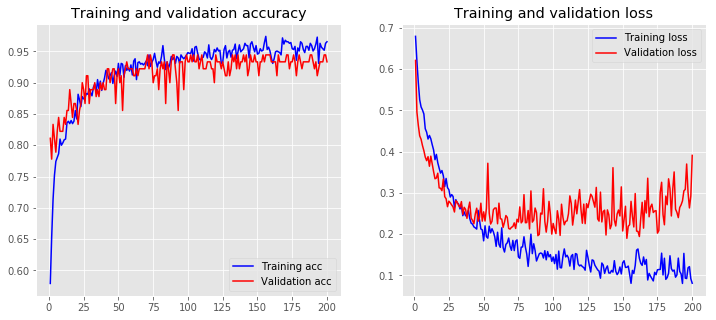

In [0]:
plot_history(history)